<a href="https://colab.research.google.com/github/domchang1/LEAF-Project/blob/main/Hayden_Summer_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#PATH = '/content/drive/My Drive/Jane Boettcher/Hayden Fu/' #Jane's example path
PATH = '/content/drive/My Drive/Hayden Fu/'


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(PATH+"compas-scores-two-years.csv")

In [ ]:
df.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [ ]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [ ]:
df.describe

<bound method NDFrame.describe of          id                 name      first         last  \
0         1     miguel hernandez     miguel    hernandez   
1         3          kevon dixon      kevon        dixon   
2         4             ed philo         ed        philo   
3         5          marcu brown      marcu        brown   
4         6   bouthy pierrelouis     bouthy  pierrelouis   
...     ...                  ...        ...          ...   
7209  10996        steven butler     steven       butler   
7210  10997      malcolm simmons    malcolm      simmons   
7211  10999      winston gregory    winston      gregory   
7212  11000          farrah jean     farrah         jean   
7213  11001  florencia sanmartin  florencia    sanmartin   

     compas_screening_date     sex         dob  age          age_cat  \
0               2013-08-14    Male  1947-04-18   69  Greater than 45   
1               2013-01-27    Male  1982-01-22   34          25 - 45   
2               2013-04-14   

In [ ]:
dfFilter = df[df['is_recid']!= -1]
dfFilter = dfFilter[dfFilter['days_b_screening_arrest'] <= 30]
dfFilter = dfFilter[dfFilter['days_b_screening_arrest'] >= -30]
dfFilter = dfFilter[dfFilter['c_charge_degree'] != 'O']

#dfFilter.drop(columns=['c_arrest_date','r_case_number','r_days_from_arrest','first','last','violent_recid', 'is_violent_recid'])
#dfFilter.drop('column name', inplace=True, axis = 1)
dfFilter.drop(['name','first','last','dob','age_cat','days_b_screening_arrest','c_case_number','r_case_number','r_charge_degree', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','violent_recid','r_days_from_arrest'], inplace=True, axis = 1)
#dfFilter['r_jail_in']
#dfFilter.columns
#dfFilter[dfFilter['r_charge_desc'].isnull()] = "none"
#
dfFilter["c_offense_date"].fillna("no date", inplace = True)
dfFilter["c_charge_desc"].fillna("no descriptions", inplace = True)
#dfFilter.isnull().sum()
#dfFilter
pd.set_option('max_columns', None)
#pd.reset_option('max_columns')
#dfFilter.head()
#df['column name'] = df['column name'].replace(['old value'],'new value')
dfFilter['sex'] = dfFilter['sex'].replace(['Male'],0)
dfFilter['sex'] = dfFilter['sex'].replace(['Female'],1)
dfFilter['v_score_text'] = dfFilter['v_score_text'].replace(['Low'],0)
dfFilter['v_score_text'] = dfFilter['v_score_text'].replace(['Medium'],1)
dfFilter['v_score_text'] = dfFilter['v_score_text'].replace(['High'],2)
dfFilter['score_text'] = dfFilter['score_text'].replace(['Low'],0)
dfFilter['score_text'] = dfFilter['score_text'].replace(['Medium'],1)
dfFilter['score_text'] = dfFilter['score_text'].replace(['High'],2)
dfFilter['race'] = dfFilter['race'].replace(['Other'],0)
dfFilter['race'] = dfFilter['race'].replace(['African-American'],1)
dfFilter['race'] = dfFilter['race'].replace(['Caucasian'],2)
dfFilter['race'] = dfFilter['race'].replace(['Hispanic'],3)
dfFilter['race'] = dfFilter['race'].replace(['Asian'],4)
dfFilter['race'] = dfFilter['race'].replace(['Native American'],5)
dfFilter['compas_screening_date'] = dfFilter['compas_screening_date'].str.slice(start = 0, stop = 4)
dfFilter['v_screening_date'] = dfFilter['v_screening_date'].str.slice(start = 0, stop = 4)
dfFilter['in_custody'] = dfFilter['in_custody'].str.slice(start = 0, stop = 4)
dfFilter['out_custody'] = dfFilter['out_custody'].str.slice(start = 0, stop = 4)
dfFilter['c_jail_in'] = dfFilter['c_jail_in'].str.slice(start = 0, stop = 4)
dfFilter['c_jail_out'] = dfFilter['c_jail_out'].str.slice(start = 0, stop = 4)
dfFilter['c_offense_date'] = dfFilter['c_offense_date'].str.slice(start = 0, stop = 4)
dfFilter['screening_date'] = dfFilter['screening_date'].str.slice(start = 0, stop = 4)
dfFilter['c_jail_duration'] = dfFilter['c_jail_in'].str.slice(start = 0, stop = 4) + "-" + dfFilter['c_jail_out'].str.slice(start = 0, stop = 4)
dfFilter['charge_desc_num'] = pd.factorize(dfFilter.c_charge_desc)[0]+1


print(dfFilter['charge_desc_num'])

#X = dfFilter
#X.columns
#X
#dfFilter

0         1
1         2
2         3
5         4
6         5
       ... 
7209    137
7210     98
7211     35
7212     13
7213    102
Name: charge_desc_num, Length: 6172, dtype: int64


In [ ]:
pd.set_option('max_columns', None)
df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [ ]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Battery / Pregnant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,0,2,0,0,3,-1.0,2014-03-08 08:06:02,2014-03-09 12:18:04,140033

In [ ]:
len(df.columns)

53

(array([115.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   3.,   0., 

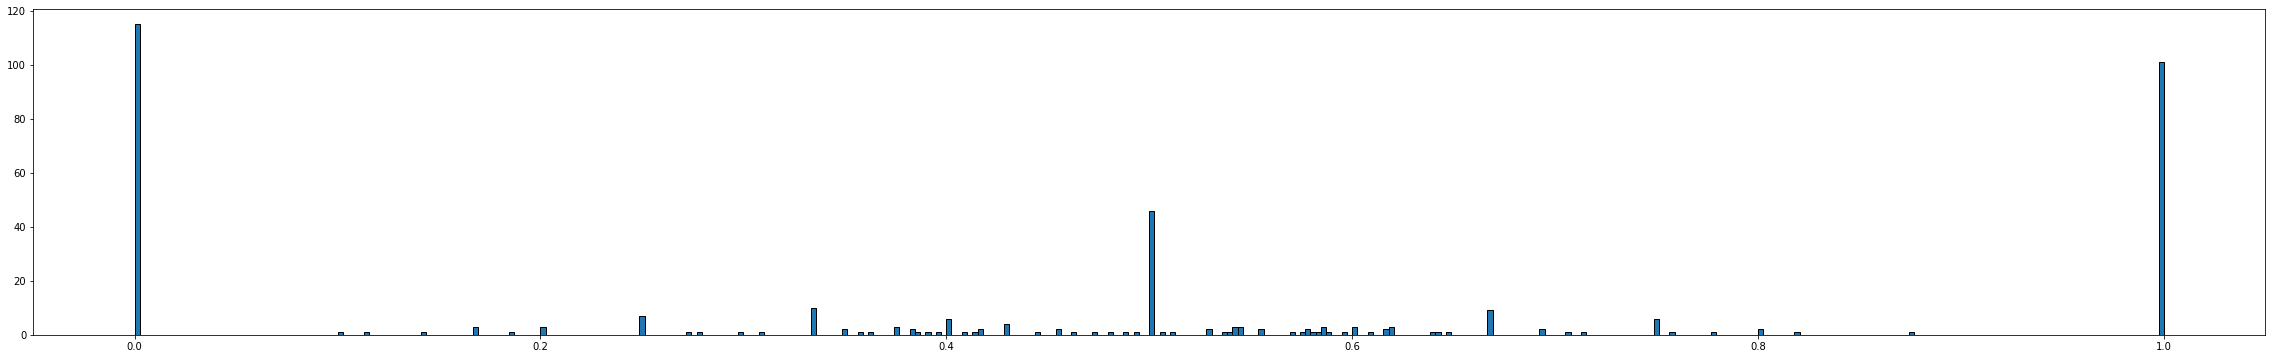

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

recidDesc = pd.DataFrame()
recidDesc['is_recid'] = dfFilter['is_recid']
recidDesc['c_charge_desc'] = dfFilter['c_charge_desc']
recidDesc = recidDesc.reset_index(drop = True)
recidDesc['count'] = pd.Series(np.ones(6171))
recidDesc['charge_desc_num'] = pd.factorize(recidDesc.c_charge_desc)[0]+1
recidDesc.groupby(by=["c_charge_desc"], as_index = False).sum().reset_index()
recidDescCountTotal = recidDesc.groupby(by=["c_charge_desc"], as_index = False).sum().reset_index()
#print(recidDescCountTotal)
recidDesc["percentages"] = recidDescCountTotal["is_recid"] / recidDescCountTotal["count"]
plt.figure(figsize=(40,6))
plt.hist(recidDesc["percentages"][recidDesc["percentages"] <= 1.0], edgecolor = 'black', bins=390)

In [ ]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
dfFilter

,id,compas_screening_date,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,is_violent_recid,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,c_jail_duration,charge_desc_num
0,1,2013,0,69,0,0,1,0,0,0,2013,2013,2013,NaN,1.0,F,Aggravated Assault w/Firearm,0,0,Risk of Recidivism,1,0,2013,Risk of Violence,1,0,2013,2014,2014,0,0,327,0,0,2013-2013,1
1,3,2013,0,34,1,0,3,0,0,0,2013,2013,2013,NaN,1.0,F,Felony Battery w/Prior Convict,1,1,Risk of Recidivism,3,0,2013,Risk of Violence,1,0,2013,2013,2013,0,9,159,1,1,2013-2013,2
2,4,2013,0,24,1,0,4,0,1,4,2013,2013,2013,NaN,1.0,F,Possession of Cocaine,1,0,Risk of Recidivism,4,0,2013,Risk of Violence,3,0,2013,2013,2013,4,0,63,0,1,2013-2013,3
5,7,2013,0,44,0,0,1,0,0,0,2013,2013,2013,NaN,0.0,M,Battery,0,0,Risk of Recidivism,1,0,2013,Risk of Violence,1,0,2013,2013,2013,0,1,853,0,0,2013-2013,4
6,8,2014,0,41,2,0,6,0,0,14,2014,2014,2014,NaN,1.0,F,Possession Burglary Tools,1,0,Risk of Recidivism,6,1,2014,Risk of Violence,2,0,2014,2014,2014,14,5,40,1,1,2014-2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,2013,0,23,1,0,7,0,0,0,2013,2013,2013,NaN,1.0,F,Deliver Cannabis,0,0,Risk of Recidivism,7,1,2013,Risk of Violence,5,1,2013,2013,2013,0,1,860,0,0,2013-2013,137
7210,10997,2014,0,23,1,0,3,0,0,0,2014,2014,2014,NaN,1.0,F,Leaving the Scene of Accident,0,0,Risk of Recidivism,3,0,2014,Risk of Violence,5,1,2014,2014,2014,0,1,790,0,0,2014-2014,98
7211,10999,2014,0,57,0,0,1,0,0,0,2014,2014,2014,NaN,1.0,F,Aggravated Battery / Pregnant,0,0,Risk of Recidivism,1,0,2014,Risk of Violence,1,0,2014,2014,2014,0,0,808,0,0,2014-2014,35
7212,11000,2014,1,33,1,0,2,0,0,3,2014,2014,2014,NaN,1.0,M,Battery on Law Enforc Officer,0,0,Risk of Recidivism,2,0,2014,Risk of Violence,2,0,2014,2014,2014,3,0,754,0,0,2014-2014,13


In [ ]:
print(dfFilter['decile_score'].unique())

[ 1  3  4  6 10  5  9  2  7  8]


In [ ]:
y_by_decile = dfFilter['decile_score'].tolist()
y_true = dfFilter['is_recid'].tolist()
for i in range(len(y_by_decile)):
  if y_by_decile[i] < 6:
    y_by_decile[i] = 0
  else:
    y_by_decile[i] = 1

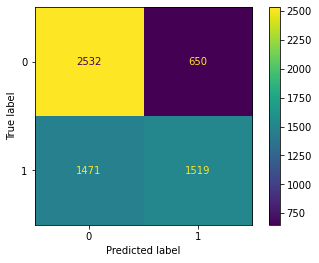

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cm = sklearn.metrics.confusion_matrix(y_true, y_by_decile)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


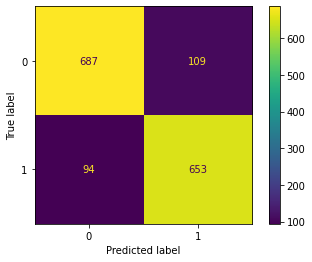

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import plot_confusion_matrix

y = np.array(dfFilter["is_recid"])
X = dfFilter.drop(columns = ["compas_screening_date",'v_type_of_assessment','c_charge_desc','c_arrest_date','c_jail_duration','out_custody','in_custody',
                             'v_screening_date','screening_date','c_offense_date','c_jail_out','c_jail_in','c_charge_degree','type_of_assessment','is_recid',
                             'decile_score','c_days_from_compas','is_violent_recid','decile_score.1','score_text','v_decile_score','v_score_text','two_year_recid','event',
                             'priors_count.1'])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state = 0)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#from sklearn.metrics import roc_curve
#from sklearn.metrics import RocCurveDisplay

#y_score = clf.decision_function(X_test)

#fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#sklearn.metrics.roc_auc_score(y_test, y_score)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
X_train

,id,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,start,end,charge_desc_num
6931,10552,1,51,2,0,0,0,0,0,385,34
1292,1976,0,23,2,0,0,0,6,0,411,137
278,407,0,22,1,0,1,1,3,0,4,4
5883,8969,0,22,1,0,0,0,1,4,367,82
968,1485,0,21,1,0,0,0,1,0,30,4
...,...,...,...,...,...,...,...,...,...,...,...
1282,1957,0,30,2,0,0,0,0,0,1056,4
2643,4031,0,53,1,0,0,0,0,0,940,4
3016,4609,0,50,2,0,0,0,0,0,30,99
7057,10761,0,24,1,0,0,0,4,0,301,66


In [ ]:
print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.average_precision_score(y_test, y_pred))
print(sklearn.metrics.recall_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred))

0.8684381075826313
0.8100392456903215
0.8741633199464525
0.8654738237243207


In [ ]:
dfFilter.columns

Index(['id', 'compas_screening_date', 'sex', 'age', 'race', 'juv_fel_count',
       'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'c_jail_in', 'c_jail_out', 'c_offense_date', 'c_arrest_date',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'is_violent_recid', 'type_of_assessment', 'decile_score.1',
       'score_text', 'screening_date', 'v_type_of_assessment',
       'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody',
       'out_custody', 'priors_count.1', 'start', 'end', 'event',
       'two_year_recid', 'c_jail_duration', 'charge_desc_num'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


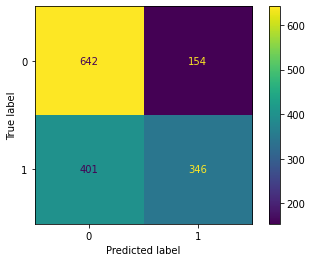

In [ ]:
X = dfFilter.drop(columns = ["compas_screening_date",'v_type_of_assessment','c_charge_desc','c_arrest_date','c_jail_duration','out_custody','in_custody',
                             'v_screening_date','screening_date','c_offense_date','c_jail_out','c_jail_in','c_charge_degree','type_of_assessment','is_recid',
                             'decile_score','c_days_from_compas','is_violent_recid','decile_score.1','score_text','v_decile_score','v_score_text','two_year_recid','event',
                             'priors_count.1'])
dfFilter['race'] = dfFilter['race'].replace(['Other'],0)
dfFilter['race'] = dfFilter['race'].replace(['African-American'],1)
dfFilter['race'] = dfFilter['race'].replace(['Caucasian'],2)
dfFilter['race'] = dfFilter['race'].replace(['Hispanic'],3)
dfFilter['race'] = dfFilter['race'].replace(['Asian'],4)
dfFilter['race'] = dfFilter['race'].replace(['Native American'],5)


X = dfFilter[['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count','priors_count.1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state = 0)
race_column = X_test['race']
gender_column = X_test['sex']
age_column = X_test['age']


X_train = X_train.drop(columns=['sex','age'])
X_test = X_test.drop(columns=['sex','age'])
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
dfFilter['race'] = dfFilter['race'].replace(['Other'],0)
dfFilter['race'] = dfFilter['race'].replace(['African-American'],1)
dfFilter['race'] = dfFilter['race'].replace(['Caucasian'],2)
dfFilter['race'] = dfFilter['race'].replace(['Hispanic'],3)
dfFilter['race'] = dfFilter['race'].replace(['Asian'],4)
dfFilter['race'] = dfFilter['race'].replace(['Native American'],5)
dfFilter['race'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
X.describe()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,0.190376,34.534511,1.472294,0.059300,0.091218,0.110661,3.246436,3.246436
std,0.392629,11.730938,0.759562,0.463599,0.497872,0.470731,4.743770,4.743770
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,42.000000,2.000000,0.000000,0.000000,0.000000,4.000000,4.000000
max,1.000000,96.000000,5.000000,20.000000,13.000000,9.000000,38.000000,38.000000


0

In [ ]:
print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.average_precision_score(y_test, y_pred))
print(sklearn.metrics.recall_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred))

0.6480881399870383
0.5872071064014104
0.47925033467202144
0.5687053216838761


In [ ]:
def my_true_positives(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  count = 0
  for i in range(len(y_true)):
    if(y_true[i] == y_pred[i] and y_true[i] == category):
      count+=1
  return count
  ### YOUR CODE HERE ###
def my_false_positives(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  count = 0
  for i in range(len(y_true)):
    if(y_pred[i] == category and y_true[i] != category):
      count+=1
  return count
  ### YOUR CODE HERE ###
#
def my_precision(y_true, y_pred, category):
  ### YOUR CODE HERE ###x
  if (my_true_positives(y_true, y_pred, category) + my_false_positives(y_true, y_pred, category))==0:
      return None
  return (my_true_positives(y_true, y_pred, category))/(my_true_positives(y_true, y_pred, category) + my_false_positives(y_true, y_pred, category))
  ### END YOUR CODE ###

def my_false_negatives(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  count = 0
  for i in range(len(y_true)):
    if(y_pred[i] != category and y_true[i] == category):
      count += 1
  return count
  ### YOUR CODE HERE ###

def my_recall(y_true, y_pred, category):
  ### YOUR CODE HERE ###
  if (my_true_positives(y_true, y_pred, category) + my_false_negatives(y_true, y_pred, category)) == 0:
      return None
  return (my_true_positives(y_true, y_pred, category))/(my_true_positives(y_true, y_pred, category) + my_false_negatives(y_true, y_pred, category))
  ### END YOUR CODE ###

In [ ]:
def print_stat(y_true,y_pred):
  print(len(y_true))
  print("    Accuracy:",sklearn.metrics.accuracy_score(y_true, y_pred))
  print("    Precision for recidivated:",my_precision(y_true, y_pred,1))
  print("    Precision for not recidivated:",my_precision(y_true, y_pred,0))
  print("    Recall for recidivated:",my_recall(y_true, y_pred,1))
  print("    Recall for not recidivated:",my_recall(y_true, y_pred,0))
  print("    Proportion predicted as not recidivated when recidivated:", my_false_positives(y_true,y_pred,0)/len(y_pred))
  print("    Proportion predicted as recidivated when not recidivated:", my_false_positives(y_true,y_pred,1)/len(y_pred))

def print_statistics(y_true,y_pred,race_column):
  print("Overall statistics:")
  print_stat(y_true,y_pred)
  races = np.unique(race_column)
  for r in races:
    print("Statistics for race =",r,":")
    indices = np.where(race_column==r)
    print_stat(y_true[indices],y_pred[indices])

In [ ]:
X_train

,juv_fel_count,juv_misd_count,juv_other_count,priors_count,priors_count.1
6931,0,0,0,0,0
1292,0,0,0,6,6
278,0,1,1,3,3
5883,0,0,0,1,1
968,0,0,0,1,1
...,...,...,...,...,...
1282,0,0,0,0,0
2643,0,0,0,0,0
3016,0,0,0,0,0
7057,0,0,0,4,4


In [ ]:
print_statistics(y_test,y_pred,np.array(race_column))

#0 = other
#1 = African-American
#2 = Caucasian
#3 = Hispanic
#4 = Asian
#5 = Native American
#

Overall statistics:
1543
    Accuracy: 0.6480881399870383
    Precision for recidivated: 0.69921875
    Precision for not recidivated: 0.6226964112512124
    Recall for recidivated: 0.47925033467202144
    Recall for not recidivated: 0.8065326633165829
    Proportion predicted as not recidivated when recidivated: 0.25210628645495786
    Proportion predicted as recidivated when not recidivated: 0.09980557355800389
Statistics for race = 0 :
90
    Accuracy: 0.6555555555555556
    Precision for recidivated: 0.6086956521739131
    Precision for not recidivated: 0.6716417910447762
    Recall for recidivated: 0.3888888888888889
    Recall for not recidivated: 0.8333333333333334
    Proportion predicted as not recidivated when recidivated: 0.24444444444444444
    Proportion predicted as recidivated when not recidivated: 0.1
Statistics for race = 1 :
796
    Accuracy: 0.6444723618090452
    Precision for recidivated: 0.7374631268436578
    Precision for not recidivated: 0.5754923413566739
    

<BarContainer object of 6 artists>

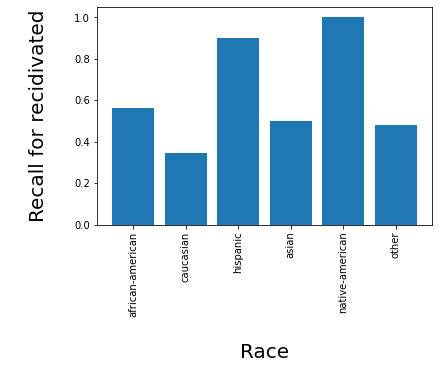

In [ ]:
# Import Library

import numpy as np
import matplotlib.pyplot as plt


#Race 0
#Recall for recidivated: 0.3888888888888889
#Race 1
#Recall for not recidivated: 0.8406779661016949
#Race 2
#Recall for recidivated: 0.34579439252336447
#Race 3
#Recall for recidivated: 0.36
#Race 4
#Recall for recidivated: 0.5
#Race 5
#Recall for recidivated: 1.0

races = ['african-american','caucasian','hispanic','asian','native-american','other']
plt.xticks(rotation = 90)
plt.xlabel('\nRace', fontsize = 20)
plt.ylabel('\nRecall for recidivated\n', fontsize = 20)
#plt.set_xticklabels(races,rotation=90, rotation_mode="anchor", ha="right")
temp = [0.5630630630630631,0.34579439252336447,0.9010989010989011,0.5,1.0,0.47925033467202144]
#African-American = 0.558425197, Caucasian = 0.415596767, Hispanic = 0.351669941, Asian = 0.322580645,
# Native American = 0.545454545, Other = 0.379008746
plt.bar(races, temp)


In [ ]:
print_statistics(y_test,y_pred,np.array(gender_column))

Overall statistics:
1543
    Accuracy: 0.6480881399870383
    Precision for recidivated: 0.69921875
    Precision for not recidivated: 0.6226964112512124
    Recall for recidivated: 0.47925033467202144
    Recall for not recidivated: 0.8065326633165829
    Proportion predicted as not recidivated when recidivated: 0.25210628645495786
    Proportion predicted as recidivated when not recidivated: 0.09980557355800389
Statistics for race = 0 :
1264
    Accuracy: 0.6400316455696202
    Precision for recidivated: 0.7096069868995634
    Precision for not recidivated: 0.6004962779156328
    Recall for recidivated: 0.5023183925811437
    Recall for not recidivated: 0.7844408427876823
    Proportion predicted as not recidivated when recidivated: 0.254746835443038
    Proportion predicted as recidivated when not recidivated: 0.10522151898734178
Statistics for race = 1 :
279
    Accuracy: 0.6845878136200717
    Precision for recidivated: 0.6111111111111112
    Precision for not recidivated: 0.70222

In [ ]:
print_statistics(y_test,y_pred,np.array(age_column))

Overall statistics:
1543
    Accuracy: 0.6480881399870383
    Precision for recidivated: 0.69921875
    Precision for not recidivated: 0.6226964112512124
    Recall for recidivated: 0.47925033467202144
    Recall for not recidivated: 0.8065326633165829
    Proportion predicted as not recidivated when recidivated: 0.25210628645495786
    Proportion predicted as recidivated when not recidivated: 0.09980557355800389
Statistics for race = 19 :
6
    Accuracy: 0.5
    Precision for recidivated: 1.0
    Precision for not recidivated: 0.0
    Recall for recidivated: 0.5
    Recall for not recidivated: None
    Proportion predicted as not recidivated when recidivated: 0.5
    Proportion predicted as recidivated when not recidivated: 0.0
Statistics for race = 20 :
37
    Accuracy: 0.40540540540540543
    Precision for recidivated: 0.8888888888888888
    Precision for not recidivated: 0.25
    Recall for recidivated: 0.27586206896551724
    Recall for not recidivated: 0.875
    Proportion predic

In [ ]:
np.where('race'==1)[0]

array([], dtype=int64)

In [ ]:
y_true

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,


In [ ]:
my_recall(y_test,y_pred,1)

0.47925033467202144

In [ ]:
my_recall(y_test,y_pred,0)

0.8065326633165829

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


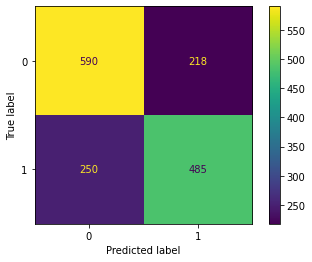

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.average_precision_score(y_test, y_pred))
print(sklearn.metrics.recall_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred))

0.5327284510693454
0.48970127979497047
0.3578231292517007
0.42181234963913394


In [ ]:
import numpy as np

(array([1773.,  874.,  197.,  130.,   16.]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 5 Patch objects>)

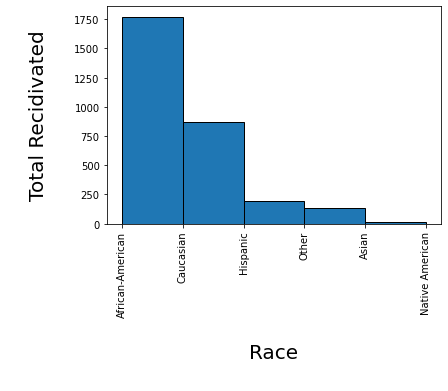

In [ ]:
import matplotlib.pyplot as plt
dfFiltered = pd.DataFrame()
dfFiltered = dfFilter
plt.xticks(rotation = 90)
plt.xlabel('\nRace\n', fontsize = 20)
plt.ylabel('\nRecidivism Rate\n', fontsize = 20)
dfFiltered['race'] = dfFilter['race'].replace([0],'Other')
dfFiltered['race'] = dfFilter['race'].replace([1],'African-American')
dfFiltered['race'] = dfFilter['race'].replace([2],'Caucasian')
dfFiltered['race'] = dfFilter['race'].replace([3],'Hispanic')
dfFiltered['race'] = dfFilter['race'].replace([4],'Asian')
dfFiltered['race'] = dfFilter['race'].replace([5],'Native American')
plt.hist(dfFiltered['race'][dfFilter['is_recid'] == 1], edgecolor = 'black', bins=5)

(array([ 213.,    0., 1402.,    0., 1229.,    0.,  312.,    0.,   21.,
           5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

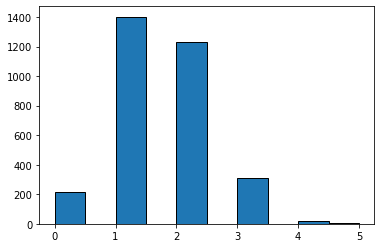

In [ ]:
plt.hist(dfFilter['race'][dfFilter['is_recid'] == 0], edgecolor = 'black')

(array([ 22., 258.,  17.,   0., 426., 382.,   0.,  54., 109.,  13.,   0.,
         25.,  13.,   0.,   1.,  20.,   0.,  50.,  27.,   3.,   0.,   3.,
          3.,   0.,  28.,   1.,   0.,  24.,  12.,   1.,   0.,   3.,   1.,
          0.,  28.,   1.,   0.,   9.,  43.,   1.,   0.,  14., 190.,   0.,
         24.,  25.,  14.,   0.,  13.,   3.,   0.,   4.,  23.,   0.,   2.,
         37.,  22.,   0.,   1.,  48.,   0.,  35.,   2.,   0.,  12.,  26.,
          9.,   0.,   9.,   6.,   0.,  39.,   1.,   0.,   3.,  22.,  14.,
          0.,  25.,  54.,   0.,  19.,   9.,  14.,   0.,   5.,  27.,   0.,
         13.,   2.,   0.,   4.,  38.,   3.,   0.,   7.,  10.,   0.,   3.,
         18.,   0.,   9.,   2.,  11.,   0.,   5.,  17.,   0.,   8.,  13.,
          0.,   9.,   9.,   4.,   0.,   4.,   2.,   0.,   1.,   7.,   1.,
          0.,   3.,  18.,   0.,   8.,   8.,   0.,   7.,   1.,  48.,   0.,
          4.,  25.,   0.,   1.,   1.,   0.,   2.,   1.,   1.,   0.,   1.,
          2.,   0.,   3.,   1.,   0., 

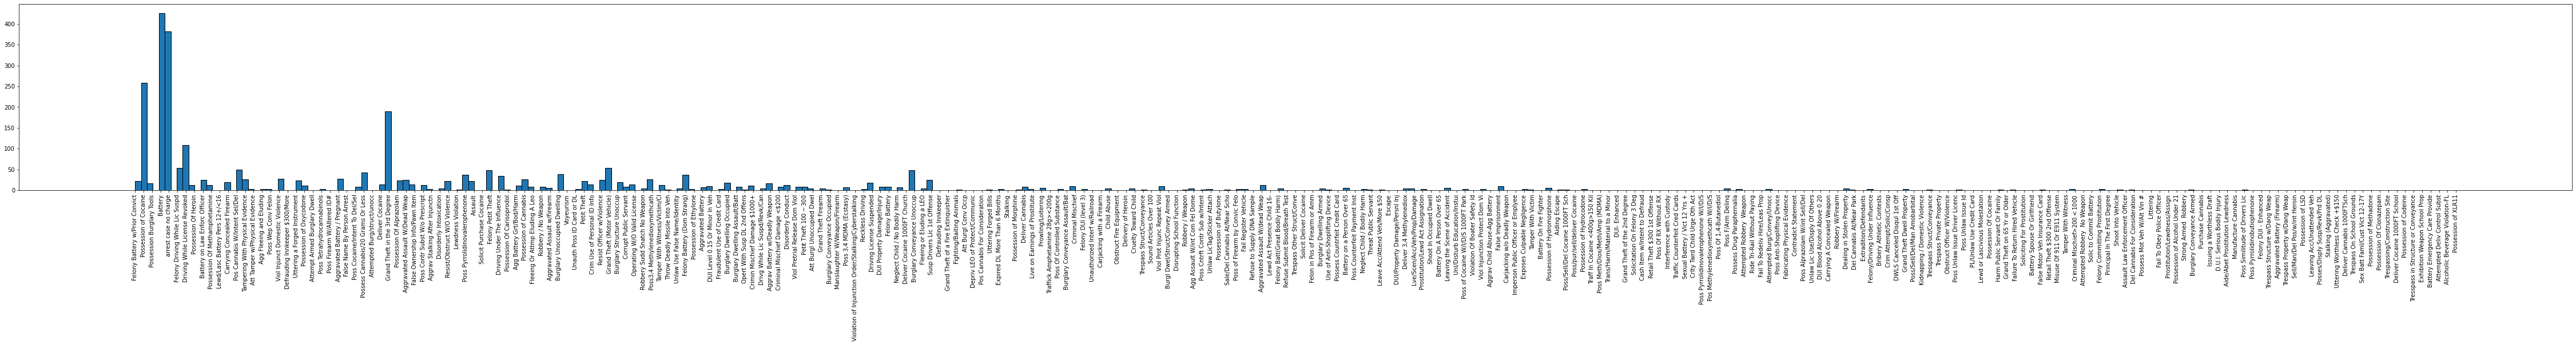

In [ ]:
plt.figure(figsize=(80,6))
plt.xticks(rotation = 90)
dfFiltered = pd.DataFrame()
dfFiltered = dfFilter
#dfFiltered.loc[dfFilter['c_charge_desc'].isin([])]

plt.hist(dfFilter['c_charge_desc'][dfFilter['is_recid'] == 1], edgecolor = 'black', bins=390)

In [ ]:
pd.set_option('display.max_rows', 500)
print(dfFilter['c_charge_desc'][:20])

0       Aggravated Assault w/Firearm
1     Felony Battery w/Prior Convict
2              Possession of Cocaine
5                            Battery
6          Possession Burglary Tools
7              arrest case no charge
8                            Battery
10           Poss 3,4 MDMA (Ecstasy)
11                           Battery
12                           Battery
13    Poss3,4 Methylenedioxymethcath
14             arrest case no charge
15    Felony Driving While Lic Suspd
16                           Battery
17     Grand Theft in the 3rd Degree
18     Driving While License Revoked
19              Possession Of Heroin
20             arrest case no charge
21     Battery on Law Enforc Officer
22     Possession Of Methamphetamine
Name: c_charge_desc, dtype: object


(array([ 130.,    0., 1773.,    0.,  874.,    0.,  197.,    0.,   10.,
           6.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

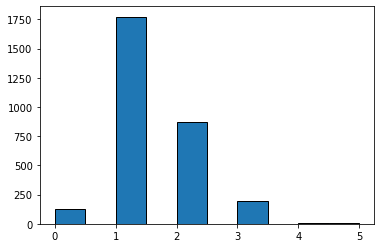

In [ ]:
plt.hist(dfFilter['race'][dfFilter['is_recid'] == 1], edgecolor = 'black')
#Other = 130, African-American = 1773, Caucasian = 874, Hispanic = 197, Asian = 10, Native American = 6
#Other = 343, African-American = 3175, Caucasian = 2103, Hispanic = 509, Asian = 31, Native American = 11
#African-American = 0.558425197, Caucasian = 0.415596767, Hispanic = 0.351669941, Asian = 0.322580645,
# Native American = 0.545454545, Other = 0.379008746

In [ ]:
#
#sex, age, race, juv_fel_count, juv_misd_count, juv_other_count, priors_count, c_offense_date, c_charge_degree, c_charge_desc, priors_count.1, 

In [ ]:
dfFilter

,id,compas_screening_date,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,is_violent_recid,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,c_jail_duration,charge_desc_num
0,1,2013,0,69,0,0,1,0,0,0,2013,2013,2013,NaN,1.0,F,Aggravated Assault w/Firearm,0,0,Risk of Recidivism,1,0,2013,Risk of Violence,1,0,2013,2014,2014,0,0,327,0,0,2013-2013,1
1,3,2013,0,34,1,0,3,0,0,0,2013,2013,2013,NaN,1.0,F,Felony Battery w/Prior Convict,1,1,Risk of Recidivism,3,0,2013,Risk of Violence,1,0,2013,2013,2013,0,9,159,1,1,2013-2013,2
2,4,2013,0,24,1,0,4,0,1,4,2013,2013,2013,NaN,1.0,F,Possession of Cocaine,1,0,Risk of Recidivism,4,0,2013,Risk of Violence,3,0,2013,2013,2013,4,0,63,0,1,2013-2013,3
5,7,2013,0,44,0,0,1,0,0,0,2013,2013,2013,NaN,0.0,M,Battery,0,0,Risk of Recidivism,1,0,2013,Risk of Violence,1,0,2013,2013,2013,0,1,853,0,0,2013-2013,4
6,8,2014,0,41,2,0,6,0,0,14,2014,2014,2014,NaN,1.0,F,Possession Burglary Tools,1,0,Risk of Recidivism,6,1,2014,Risk of Violence,2,0,2014,2014,2014,14,5,40,1,1,2014-2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,2013,0,23,1,0,7,0,0,0,2013,2013,2013,NaN,1.0,F,Deliver Cannabis,0,0,Risk of Recidivism,7,1,2013,Risk of Violence,5,1,2013,2013,2013,0,1,860,0,0,2013-2013,137
7210,10997,2014,0,23,1,0,3,0,0,0,2014,2014,2014,NaN,1.0,F,Leaving the Scene of Accident,0,0,Risk of Recidivism,3,0,2014,Risk of Violence,5,1,2014,2014,2014,0,1,790,0,0,2014-2014,98
7211,10999,2014,0,57,0,0,1,0,0,0,2014,2014,2014,NaN,1.0,F,Aggravated Battery / Pregnant,0,0,Risk of Recidivism,1,0,2014,Risk of Violence,1,0,2014,2014,2014,0,0,808,0,0,2014-2014,35
7212,11000,2014,1,33,1,0,2,0,0,3,2014,2014,2014,NaN,1.0,M,Battery on Law Enforc Officer,0,0,Risk of Recidivism,2,0,2014,Risk of Violence,2,0,2014,2014,2014,3,0,754,0,0,2014-2014,13


In [ ]:
#filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) 
#African American:0.558425197
dfFilter[(dfFilter['race'] == 2) & (dfFilter['is_recid'] == 1)].sum()
#(dfFilter['race'] == 2).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


id                                                                 4807531
compas_screening_date    2014201320132014201420132013201320142014201320...
sex                                                                    177
age                                                                  30263
race                                                                  1748
juv_fel_count                                                           45
decile_score                                                          4072
juv_misd_count                                                          59
juv_other_count                                                        125
priors_count                                                          3003
c_jail_in                2014201320132014201420132013201320142014201320...
c_jail_out               2014201320132014201420132013201320142014201320...
c_offense_date           2014no d20132014201420132013201320142014201320...
c_days_from_compas       